In [1]:
from gapminder import gapminder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as nplin
from sklearn.linear_model import LinearRegression

In [2]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


Text(0, 0.5, 'LifeExp')

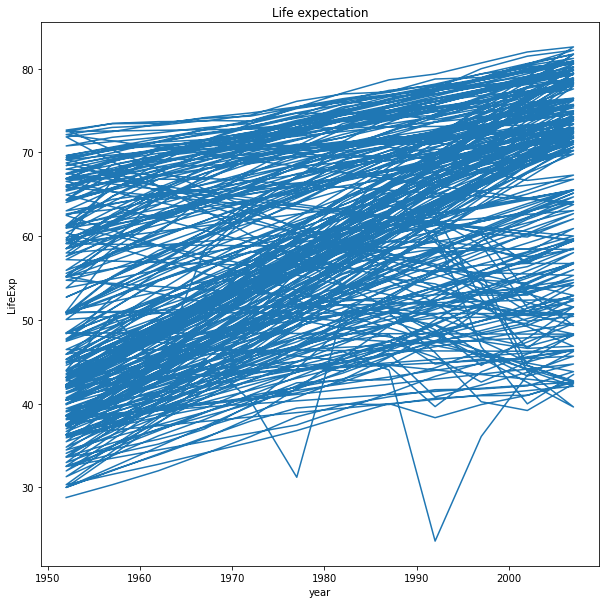

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(gapminder["year"], gapminder["lifeExp"])
ax.set_title("Life expectation")
ax.set_xlabel("year")
ax.set_ylabel("LifeExp")

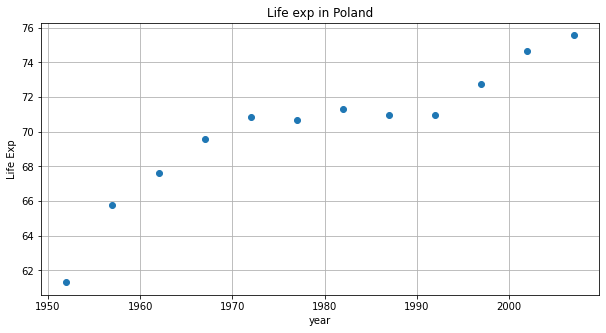

In [4]:
data = gapminder[gapminder["country"] == "Poland"]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(data["year"], data["lifeExp"])
ax.set_title("Life exp in Poland")
ax.set_xlabel("year")
ax.set_ylabel("Life Exp")
ax.grid()

Musimy znalezsc parametry $a_0$ i oraz $a_1$ dla ktorych zminimalizujemy blad najmniejszych kwadratow. Ponizej dla losowych parametrow.

Mean squared error:  9.271786365995867


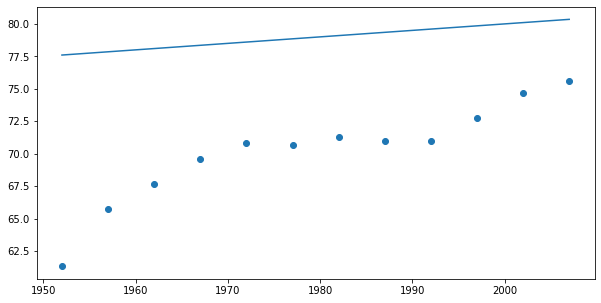

In [11]:
def f(a, data):
    return a[0] * data["year"] + a[1]

def error(a, data):
    return (((f(a, data) - data['lifeExp'])**2).mean())**(1/2)

a = 0.05, -20

yline = lambda x: a[0] * x + a[1]

min_year = min(data['year'])
max_year = max(data['year'])

print("Mean squared error: ", error(a, data))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(data['year'], data['lifeExp'])

ax.plot([min_year, max_year], [yline(min_year), yline(max_year)])

Teraz wykorzystam metode lstsq do rozwiazania problemu najmniejszych kwadratow.

Blad wyliczony moja funkcja:  1.4799680075987849
Blad wyliczony lstsq:  [26.28366364]


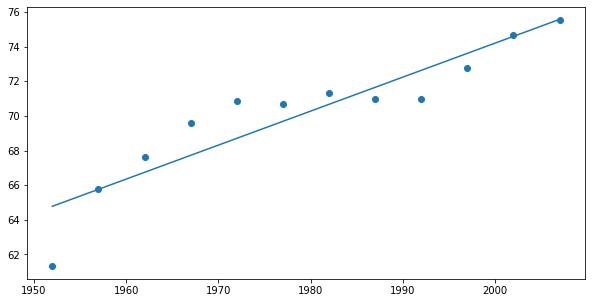

In [7]:
A = np.vander(data['year'], 2)

# Wyznaczenie wspolczynnikow za pomoca rozwiazania problmu najmniejszych kwadratow
c, res, r, s = nplin.lstsq(A, data['lifeExp'], rcond=-1)

print("Blad wyliczony moja funkcja: ", error(c, data))
print("Blad wyliczony lstsq: ", res)

p_int = np.poly1d(c)

min_year = min(data['year'])
max_year = max(data['year'])

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(data['year'], data['lifeExp'])

x = np.linspace(min_year, max_year, 100)
ax.plot(x, p_int(x))

In [8]:
predict = lambda year, a: a[0] * year + a[1]

data["prediction"] = predict(data["year"], c)
data["res"] = abs(data["prediction"] - data["lifeExp"])
data

C:\Users\dmatr\AppData\Local\Temp\ipykernel_16120\674730787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["prediction"] = predict(data["year"], c)
C:\Users\dmatr\AppData\Local\Temp\ipykernel_16120\674730787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["res"] = abs(data["prediction"] - data["lifeExp"])


,country,continent,year,lifeExp,pop,gdpPercap,prediction,res
1224,Poland,Europe,1952,61.310,25730551,4029.329699,64.780897,3.470897
1225,Poland,Europe,1957,65.770,28235346,4734.253019,65.761992,0.008008
1226,Poland,Europe,1962,67.640,30329617,5338.752143,66.743086,0.896914
1227,Poland,Europe,1967,69.610,31785378,6557.152776,67.724181,1.885819
1228,Poland,Europe,1972,70.850,33039545,8006.506993,68.705275,2.144725
1229,Poland,Europe,1977,70.670,34621254,9508.141454,69.686369,0.983631
1230,Poland,Europe,1982,71.320,36227381,8451.531004,70.667464,0.652536
1231,Poland,Europe,1987,70.980,37740710,9082.351172,71.648558,0.668558
1232,Poland,Europe,1992,70.990,38370697,7738.881247,72.629653,1.639653
1233,Poland,Europe,1997,72.750,38654957,10159.583680,73.610747,0.860747


In [9]:
X = np.array(data["year"]).reshape(-1, 1)
y = np.array(data["lifeExp"]).reshape(-1, 1)

lr = LinearRegression().fit(X, y)

a = lr.coef_[0][0], lr.intercept_[0]

error(a, data)

1.47996800759879

Model LinearRegression daje takie same rezultaty jak funkcja lstsq.